### 基本语法

In [2]:
import tensorflow as tf
import numpy as np

In [3]:
# 使用 NumPy 生成假数据(phony data), 总共 100 个点.
x_data = np.float32(np.random.rand(2, 100)) # 随机输入
y_data = np.dot([0.100, 0.200], x_data) + 0.300

In [7]:
b = tf.Variable(tf.zeros([1]))
W = tf.Variable(tf.random_uniform([1, 2], -1.0, 1.0))
y = tf.matmul(W, x_data) + b

In [12]:
print (y)

Tensor("add:0", shape=(1, 100), dtype=float32)


In [15]:
hello = tf.constant('hello,TensorFlow!')
sess = tf.Session()
print (sess.run(hello))

b'hello,TensorFlow!'


In [16]:
a = tf.constant(10)
b = tf.constant(32)
print(sess.run(a+b))

42


In [17]:
matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2.],[2.]])

In [18]:
product = tf.matmul(matrix1, matrix2) #矩阵的乘法 matrix multiply

In [21]:
sess.run(product)

array([[12.]], dtype=float32)

In [22]:
sess.close()

In [4]:
input1 = tf.constant(3.0)
input2 = tf.constant(2.0)
input3 = tf.constant(5.0)
intermed = tf.add(input2, input3)
mul = tf.multiply(input1, intermed)
with tf.Session() as sess:
    result = sess.run([mul,intermed])
    print(result)

[21.0, 7.0]


In [8]:
#创建占位符
sess = tf.Session()
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)
output = tf.multiply(input1,input2)
print(sess.run([output],feed_dict={input1:[7.],input2:[2.]}))#以字典的形式传入
sess.close()

[array([14.], dtype=float32)]


### tensorFlow简单使用案例

In [9]:
x_data = np.random.rand(100)
y_data = x_data*0.1 + 0.2

#构建一个线性模型
b = tf.Variable(0.)
k = tf.Variable(0.)
y = k * x_data +b

#二次代价函数
loss = tf.reduce_mean(tf.square(y_data - y))

#定义一个梯度下降法来进行训练的优化器
optimizer = tf.train.GradientDescentOptimizer(0.2)

#最小化代价函数
train = optimizer.minimize(loss)

#初始化变量
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for step in range(201):
        sess.run(train)
        if step%20 == 0:
            print(step,sess.run([k,b]))

0 [0.050264042, 0.09900274]
20 [0.100742824, 0.19962241]
40 [0.10043839, 0.19977725]
60 [0.1002587, 0.19986854]
80 [0.100152664, 0.19992243]
100 [0.10009008, 0.19995423]
120 [0.10005315, 0.19997299]
140 [0.100031376, 0.19998406]
160 [0.100018516, 0.19999059]
180 [0.100010924, 0.19999444]
200 [0.100006446, 0.19999672]


### 非线性回归

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

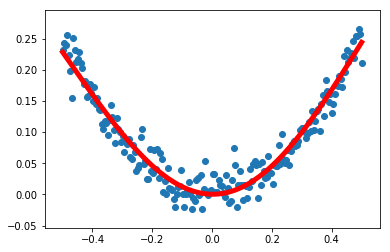

In [26]:
#使用numpy生成200个随机点
x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]
noise = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data)+noise

#定义两个placeholder
x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])

#定义神经网络的中间层
Weights_L1 = tf.Variable(tf.random_normal([1,10]))
bias_L1 = tf.Variable(tf.zeros([1,10]))                      
Wx_plus_b_L1 = tf.matmul(x,Weights_L1) + bias_L1
L1 = tf.nn.tanh(Wx_plus_b_L1)

#定义输出层
Weights_L2 = tf.Variable(tf.random_normal([10,1]))
bias_L2 = tf.Variable(tf.zeros([1,1]))
Wx_plus_b_L2 = tf.matmul(L1,Weights_L2) + bias_L2
prediction = tf.nn.tanh(Wx_plus_b_L2)

#二次代价函数
loss = tf.reduce_mean(tf.square(y - prediction))
#使用梯度下降法
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.Session() as sess:
    #变量初始化
    sess.run(tf.global_variables_initializer())
    for _ in range(2000):
        sess.run(train_step,feed_dict={x:x_data,y:y_data})
    
    #获得预测值
    prediction_value = sess.run(prediction,feed_dict={x:x_data})
    plt.figure()
    plt.scatter(x_data,y_data)
    plt.plot(x_data,prediction_value,'r-',lw=5)
    plt.show()

### MNIST数据集分类简单版本

In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
#载入数据集
mnist = input_data.read_data_sets('MNIST_data',one_hot = True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [8]:
#每个批次的大小
batch_size = 100

#计算一共有多少个批次
n_batch = mnist.train.num_examples // batch_size

#定义两个placeholder
x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])
keep_prob = tf.placeholder(tf.float32)

#创建一个简单的神经网络
W1 = tf.Variable(tf.truncated_normal([784,200],stddev=0.1))
b1 = tf.Variable(tf.zeros([200])+0.1)
L1 = tf.nn.tanh(tf.matmul(x,W1)+b1)
L1_drop = tf.nn.dropout(L1,keep_prob)

W2 = tf.Variable(tf.truncated_normal([200,100],stddev=0.1))
b2 = tf.Variable(tf.zeros([100])+0.1)
L2 = tf.nn.tanh(tf.matmul(L1_drop,W2)+b2)
L2_drop = tf.nn.dropout(L2,keep_prob)

W3 = tf.Variable(tf.truncated_normal([100,100],stddev=0.1))
b3 = tf.Variable(tf.zeros([100])+0.1)
L3 = tf.nn.tanh(tf.matmul(L2_drop,W3)+b3)
L3_drop = tf.nn.dropout(L3,keep_prob)

W4 = tf.Variable(tf.truncated_normal([100,10],stddev=0.1))
b4 = tf.Variable(tf.zeros([10])+0.1)
prediction = tf.nn.softmax(tf.matmul(L3_drop,W4)+b4)

#定义二次代价函数
# loss = tf.reduce_mean(tf.square(y - prediction))
#定义交叉熵代价函数
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y,logits = prediction))

#使用梯度下降法
# train_step = tf.train.GradientDescentOptimizer(0.2).minimize(loss)
train_step = tf.train.AdamOptimizer(1e-2).minimize(loss)

#初始化变量
init = tf.global_variables_initializer()

#结果存放在一个布尔型列表中
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(prediction,1)) #argmax返回以为张量中最大的值所在的位置

#求准确率
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(21):
        for batch in range(n_batch):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train_step,feed_dict = {x:batch_xs,y:batch_ys,keep_prob:0.7})
            
        train_acc = sess.run(accuracy,feed_dict={x:mnist.train.images,y:mnist.train.labels,keep_prob:1.0})
        test_acc = sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels,keep_prob:1.0})
        print('Iter'+str(epoch)+'.Training Accuracy'+str(train_acc)+',Testing Accuracy'+str(test_acc)) 

Iter0.Training Accuracy0.89396363,Testing Accuracy0.8964
Iter1.Training Accuracy0.90081817,Testing Accuracy0.9011
Iter2.Training Accuracy0.9000546,Testing Accuracy0.9026
Iter3.Training Accuracy0.89647275,Testing Accuracy0.9016
Iter4.Training Accuracy0.8985818,Testing Accuracy0.9029
Iter5.Training Accuracy0.8807455,Testing Accuracy0.8883
Iter6.Training Accuracy0.88427275,Testing Accuracy0.8897
Iter7.Training Accuracy0.8850909,Testing Accuracy0.8904
Iter8.Training Accuracy0.89592725,Testing Accuracy0.8947
Iter9.Training Accuracy0.9014,Testing Accuracy0.9048
Iter10.Training Accuracy0.89674544,Testing Accuracy0.9005
Iter11.Training Accuracy0.8956,Testing Accuracy0.8958
Iter12.Training Accuracy0.90018183,Testing Accuracy0.9041
Iter13.Training Accuracy0.8857818,Testing Accuracy0.8895
Iter14.Training Accuracy0.88934547,Testing Accuracy0.8935
Iter15.Training Accuracy0.8891636,Testing Accuracy0.8932
Iter16.Training Accuracy0.8854,Testing Accuracy0.8926
Iter17.Training Accuracy0.8936909,Testing 

### 深入MNIST

In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
#载入数据集
mnist = input_data.read_data_sets('MNIST_data',one_hot = True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [3]:
#TensorFlow交互式回话
sess = tf.InteractiveSession()

In [4]:
#创建图的输入和输出,,占位符
x = tf.placeholder('float',shape=[None,784])
y_ =tf.placeholder('float',shape=[None,10]) 

#变量
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

#初始化
sess.run(tf.global_variables_initializer())

In [5]:
#预测分类与损失函数
y = tf.nn.softmax(tf.matmul(x,W)+b)

#交叉熵
cross_entropy = -tf.reduce_sum(y_*tf.log(y))

In [6]:
#训练模型
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)
for i in range(1000):
    batch = mnist.train.next_batch(50)
    train_step.run(feed_dict={x:batch[0],y_:batch[1]})

#评估模型
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,'float'))
print(accuracy.eval(feed_dict={x:mnist.test.images,y_:mnist.test.labels}))

0.9181


In [9]:
#构建一个多层卷积网络
def weight_variable(shape):
    initial = tf.truncated_normal(shape,stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1,shape = shape)
    return tf.Variable(initial)
#定义卷积函数
def con2d(x,W):
    return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='SAME')
#定义池化层
def max_pool_2x2(x):
    return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

In [10]:
#第一层卷积
W_conv1 = weight_variable([5,5,1,32]) #5行5列的kernel，1个通道，32个kernel，即提取32个特征
b_conv1 = bias_variable([32])

x_image = tf.reshape(x,[-1,28,28,1])

h_convl1 = tf.nn.relu(con2d(x_image,W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_convl1)

In [12]:
#第二层卷积
W_conv2 = weight_variable([5,5,32,64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(con2d(h_pool1,W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

In [14]:
#密集连接层
W_fcl = weight_variable([7*7*64,1024])
b_fcl = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2,[-1,7*7*64])
h_fcl = tf.nn.relu(tf.matmul(h_pool2_flat,W_fcl)+b_fcl)

keep_prob = tf.placeholder('float')
h_fcl_drop = tf.nn.dropout(h_fcl,keep_prob)

#输出层
W_fc2 = weight_variable([1024,10])
b_fc2 = bias_variable([10])

y_conv = tf.nn.softmax(tf.matmul(h_fcl_drop,W_fc2) + b_fc2)

In [ ]:
#训练和评估模型
cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1),tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,'float'))
sess.run(tf.initialize_all_variables())
for i in range(1000):
    batch = mnist.train.next_batch(50)
    if i%100 == 0:
        train_accuracy = accuracy.eval(feed_dict = {x:batch[0],y_:batch[1],keep_prob:1.0})
        print('step %d,training accuracy %g'%(i,train_accuracy))
    
    train_step.run(feed_dict={x:batch[0],y_:batch[1],keep_prob:0.5})
print('test accuracy %g'%accuracy.eval(feed_dict={x:mnist.test.images,y_:mnist.test.labels,keep_prob:1.0}))

step 0,training accuracy 0.1
step 100,training accuracy 0.9
step 200,training accuracy 0.84
step 300,training accuracy 0.9
step 400,training accuracy 0.94
step 500,training accuracy 0.98
step 600,training accuracy 1
step 700,training accuracy 0.92
step 800,training accuracy 0.98
step 900,training accuracy 0.94
